In [192]:
import os
from glob import glob
import numpy as np
import librosa

import torch
import torchaudio

import utils
import audio_utils
import dataset

import matplotlib
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

In [193]:
# ArtistsCard_F_2_아이유 (IU)_밤편지_0026_gt / 이상무
# ArtistsCard_F_2_아이유 (IU)_밤편지_0034_gt / 2-7 clip / 5-5.2 mask
# ArtistsCard_F_3_선우정아_구애_0009_gt / 11-16 clip / 14.1 - 14.2 mask
# ArtistsCard_F_3_아이유_밤편지_0016_gt / 3-8 clip / 5.1 - 5.2, 7.2-7.3 mask
# ArtistsCard_F_5_윤하_봄은 있었다_0015_gt / 이상무
# ArtistsCard_F_5_윤하_봄은 있었다_0028_gt / 2-7clip / 4.4-4.5, 4.6-4.7, 5.5-5.6, 5.65-5.75


In [194]:
glitch_dir = '/data1/singing_inpainting/glitch_examples'
glitch_names = ['ArtistsCard_F_2_아이유 (IU)_밤편지_0034', 'ArtistsCard_F_3_선우정아_구애_0009', 'ArtistsCard_F_3_아이유_밤편지_0016',
        'ArtistsCard_F_5_윤하_봄은 있었다_0028']

In [195]:
gts = [os.path.join(glitch_dir, i + '_gt.wav') for i in glitch_names]
recons = [os.path.join(glitch_dir, i + '_recon.wav') for i in glitch_names]

In [196]:
start_sample = sr*2
end_sample = start_frame + sr*5 + 1
gt_audio, sr = torchaudio.load(gts[0])
rc_audio, sr = torchaudio.load(recons[0])

In [197]:
gt_spec = audio_utils.get_spectrogram(gt_audio[0][start_sample:end_sample])
rc_spec = audio_utils.get_spectrogram(rc_audio[0][start_sample:end_sample])

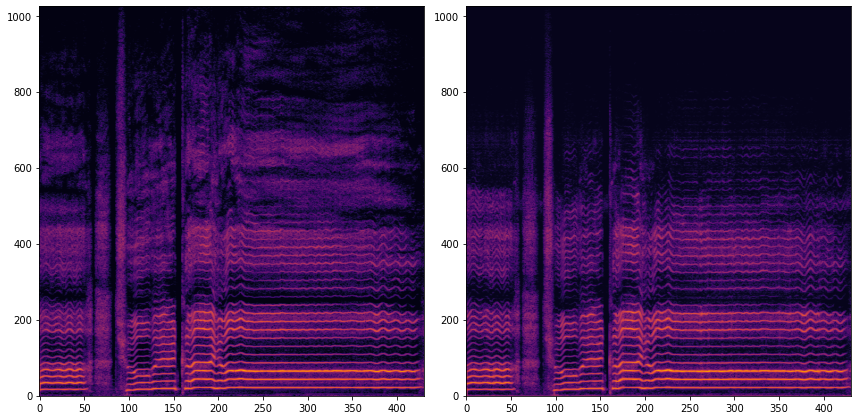

In [198]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
fig.tight_layout()
axes[0].imshow(librosa.power_to_db(gt_spec), origin='lower', aspect='auto', cmap='inferno', vmin=-50, vmax=50)
axes[1].imshow(librosa.power_to_db(rc_spec), origin='lower', aspect='auto', cmap='inferno', vmin=-50, vmax=50)
plt.show()

In [201]:
print(gt_spec.min(), gt_spec.max())
librosa.power_to_db(gt_spec).min(), librosa.power_to_db(gt_spec).max()

tensor(1.0154e-12) tensor(2073.2502)


(-46.83348, 33.16652)

In [210]:
librosa.power_to_db(gt_spec).min()

-46.83348

In [152]:
ipd.Audio(gt_audio[0][start_sample:end_sample], rate=sr)

In [153]:
ipd.Audio(rc_audio[0][start_sample:end_sample], rate=sr)

In [101]:
mask = torch.zeros([1, 1025, 431])

In [161]:
mask = torch.zeros([1, sr*5])
mask_start_sample = 3 * sr
mask_end_sample = int(np.round(3.2 * sr))
mask[0][mask_start_sample:mask_end_sample] = 1

In [187]:
mask.shape

torch.Size([1, 220500])

In [162]:
mask_spec = audio_utils.get_spectrogram(mask)

In [168]:
a = mask_spec.sum(axis=1)
mask_range = torch.where(a != 0)
mask_start = torch.min(mask_range[-1])
mask_end = torch.max(mask_range[-1])
mask_spec = torch.zeros(mask_spec.shape)
mask_spec[:,200:400,mask_start:mask_end] = 1

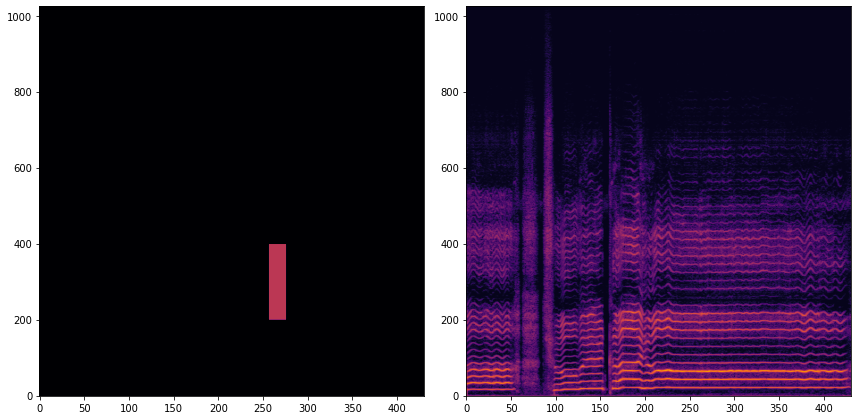

In [169]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
fig.tight_layout()
axes[0].imshow(librosa.power_to_db(mask_spec[0]), origin='lower', aspect='auto', cmap='inferno', vmin=-50, vmax=50)
axes[1].imshow(librosa.power_to_db(rc_spec), origin='lower', aspect='auto', cmap='inferno', vmin=-50, vmax=50)
plt.show()

In [180]:
a = mask_spec.sum(axis=1)
mask_range = torch.where(a != 0)
mask_start = torch.min(mask_range[-1])
mask_end = torch.max(mask_range[-1])
mask_spec[...,mask_start:mask_end] = 1

In [186]:
torch.where(mask_spec.sum(axis=1) != 0)

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
         271, 272, 273, 274, 275, 276]))

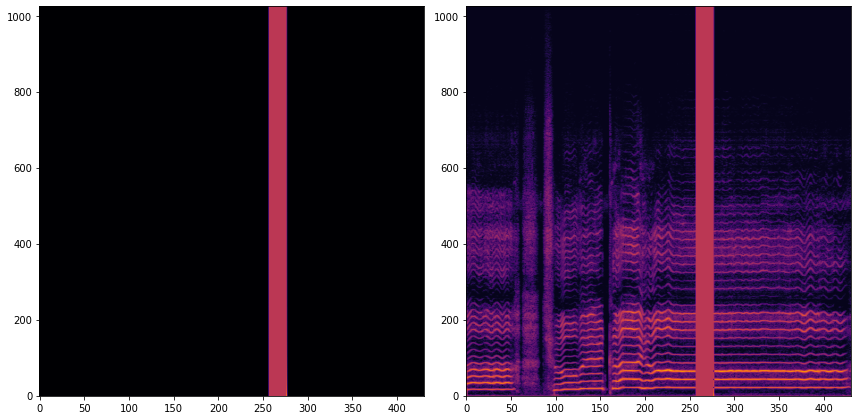

In [154]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
fig.tight_layout()
axes[0].imshow(librosa.power_to_db(mask_spec[0]), origin='lower', aspect='auto', cmap='inferno', vmin=-50, vmax=50)
axes[1].imshow(librosa.power_to_db(rc_spec * (1-mask_spec[0]) + mask_spec[0]), origin='lower', aspect='auto', cmap='inferno', vmin=-50, vmax=50)
plt.show()

In [188]:
44100*5

220500